# Road Accident Data Analysis

## Overview
This analyzes a **road accident dataset** using Python libraries:  
- **Pandas** for data processing  
- **NumPy** for numerical operations  
- **Matplotlib & Seaborn** for data visualization  
- **Scikit-learn** for feature encoding  

## Data Preprocessing
- Converted `Accident Date` and `Time` to **datetime format**.
- Extracted `Year`, `Month`, `Day`, and `Hour` for trend analysis.
- Handled missing values:
  - Categorical → "Unknown"
  - Numerical → Median values
- Removed **duplicate entries** to ensure data quality.

## Exploratory Data Analysis (EDA)

### Accident Trends
- **Yearly Trend:** Number of accidents per year.
- **Monthly Trend:** Seasonal variations in accidents.
- **Day & Hour Analysis:** Identifying peak accident times.

### Severity-Based Comparisons
- **Severity Distribution:** Count of slight, serious, and fatal accidents.
- **Casualties by Severity:** Accidents with higher casualties are often more severe.

### Speed Limits & Accidents
- Higher speed limits correlate with more casualties.
- Boxplot visualization: Impact of speed on accident severity.

### Correlation Analysis
- Heatmap of numerical features to identify relationships.
- Speed limits and number of vehicles have a strong impact on accident severity.

### Weather & Road Conditions Impact
- Accidents under different weather conditions.
- Impact of wet or icy roads on accident rates.

### Time of Day Analysis
- Histogram of accidents by hour.
- Peak accident times: Morning (8 AM - 10 AM) and evening (5 PM - 8 PM).

### Vehicle Type Involvement
- Top 10 most involved vehicle types.
- Cars, motorcycles, and taxis are the most frequently involved.

### Geospatial Accident Hotspots
- Scatter plot of accident locations using latitude and longitude.
- Identifying accident-prone areas.

### Predictive Modeling Insights
- Feature encoding for accident severity.
- Relationship between speed limits, number of vehicles, and accident severity.

# Import all the libraries and read it using "pd.read_csv()"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "Road Accident Data.csv"  
df = pd.read_csv(file_path)

# Stage 1 - pre-processing of data 
we need to choose the required set of fields/data and cleaning is the process of removing invalid fields,blanks etc 

### Convert 'Accident Date' to datetime format

In [3]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'])

### Extract useful date features

In [4]:
df['Accident_Year'] = df['Accident Date'].dt.year
df['Accident_Month'] = df['Accident Date'].dt.month
df['Accident_Day'] = df['Accident Date'].dt.day

### Convert 'Time' to datetime format and extract hour

In [5]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')
df['Hour'] = df['Time'].dt.hour

### Fill missing categorical values with 'Unknown' and numerical with median

In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

### print the fields 

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Month                       307973 non-null  object        
 3   Day_of_Week                 307973 non-null  object        
 4   Year                        307973 non-null  int64         
 5   Junction_Control            307973 non-null  object        
 6   Junction_Detail             307973 non-null  object        
 7   Accident_Severity           307973 non-null  object        
 8   Latitude                    307973 non-null  float64       
 9   Light_Conditions            307973 non-null  object        
 10  Local_Authority_(District)  307973 non-null  object        
 11  Carriageway_Hazards         307973 non-


### Accidents per year

/var/folders/x4/2y3znnw91g1b_9wcy2b7t8_c0000gp/T/ipykernel_34720/4241930652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Accident_Year"], palette="viridis")


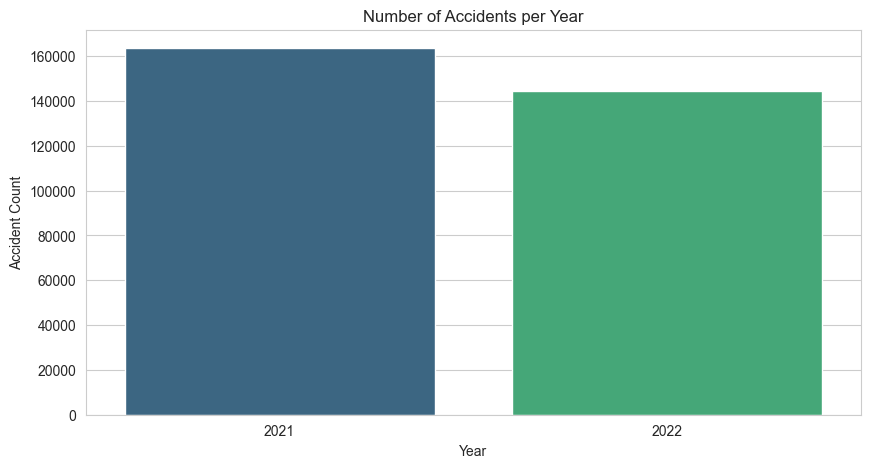

In [9]:
# Set style
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.countplot(x=df["Accident_Year"], palette="viridis")
plt.title("Number of Accidents per Year")
plt.xlabel("Year")
plt.ylabel("Accident Count")
plt.show()


### Accidents per month

/var/folders/x4/2y3znnw91g1b_9wcy2b7t8_c0000gp/T/ipykernel_34720/964583916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Accident_Month"], palette="magma")


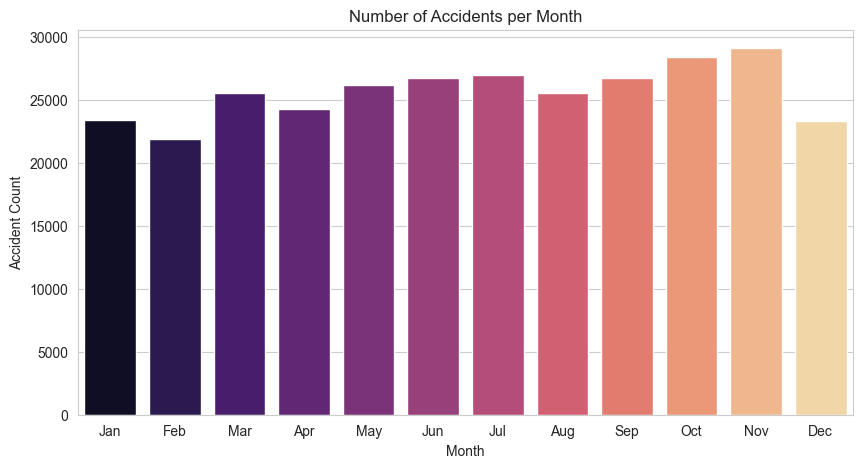

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Accident_Month"], palette="magma")
plt.title("Number of Accidents per Month")
plt.xlabel("Month")
plt.ylabel("Accident Count")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Accidents per day of the week

/var/folders/x4/2y3znnw91g1b_9wcy2b7t8_c0000gp/T/ipykernel_34720/3578712394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Day_of_Week"], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="coolwarm")


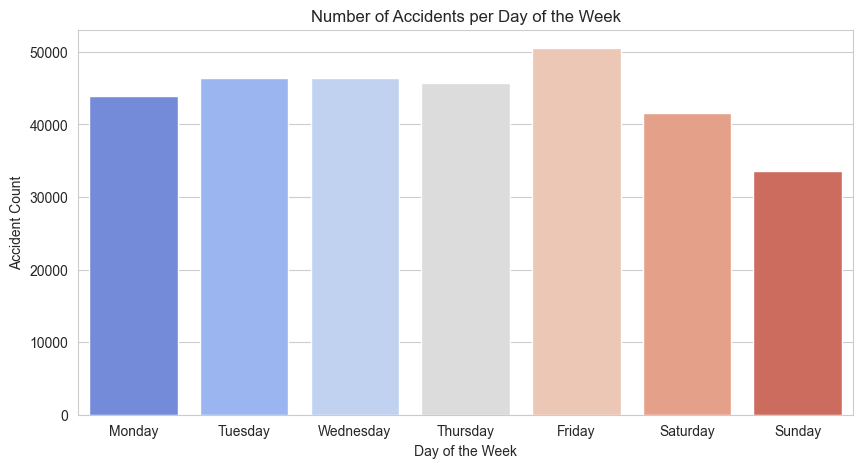

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Day_of_Week"], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="coolwarm")
plt.title("Number of Accidents per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Accident Count")
plt.show()

### Accidents per hour

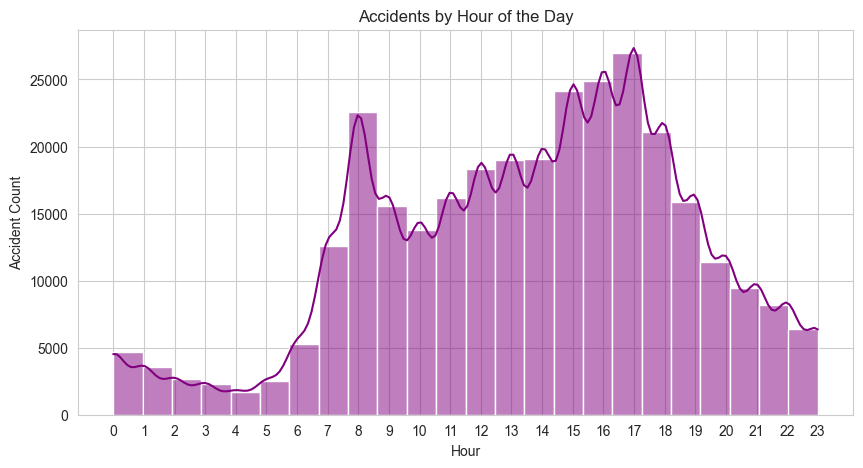

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Hour"].dropna(), bins=24, kde=True, color="purple")
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Accident Count")
plt.xticks(range(0, 24))
plt.show()

### Accident Severity Distribution

/var/folders/x4/2y3znnw91g1b_9wcy2b7t8_c0000gp/T/ipykernel_34720/459887135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Accident_Severity"], palette="Set2")


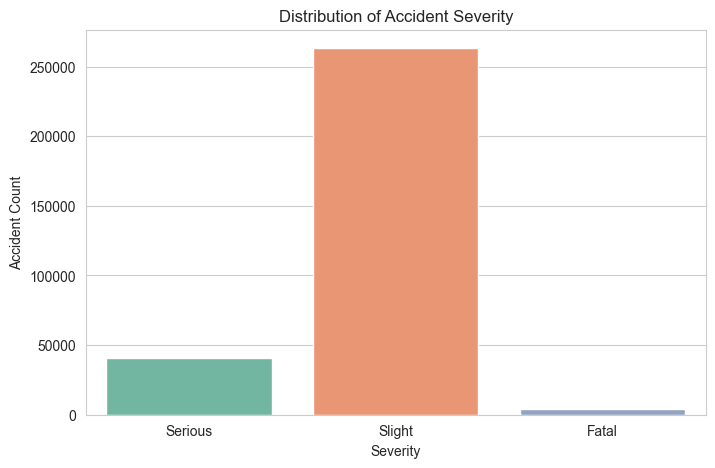

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Accident_Severity"], palette="Set2")
plt.title("Distribution of Accident Severity")
plt.xlabel("Severity")
plt.ylabel("Accident Count")
plt.show()

### Impact of Speed Limits

/var/folders/x4/2y3znnw91g1b_9wcy2b7t8_c0000gp/T/ipykernel_34720/2085632166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Speed_limit"], y=df["Number_of_Casualties"], palette="coolwarm")


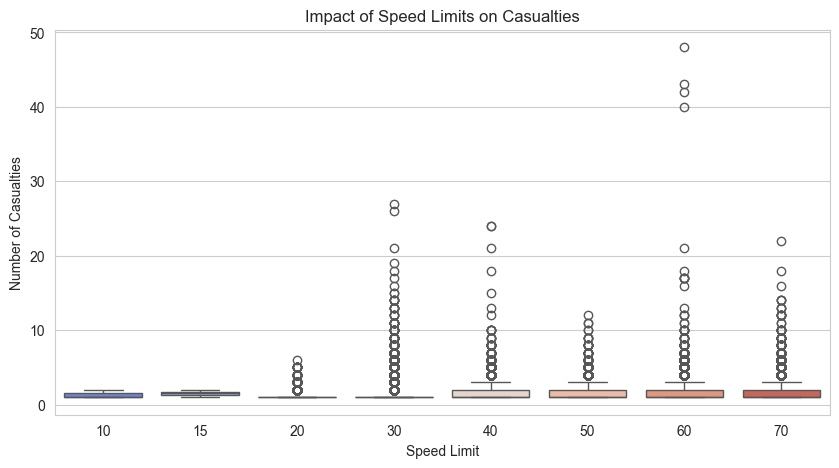

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Speed_limit"], y=df["Number_of_Casualties"], palette="coolwarm")
plt.title("Impact of Speed Limits on Casualties")
plt.xlabel("Speed Limit")
plt.ylabel("Number of Casualties")
plt.show()


### Weather Conditions

/var/folders/x4/2y3znnw91g1b_9wcy2b7t8_c0000gp/T/ipykernel_34720/4194267895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Weather_Conditions"], order=df["Weather_Conditions"].value_counts().index, palette="Blues_r")


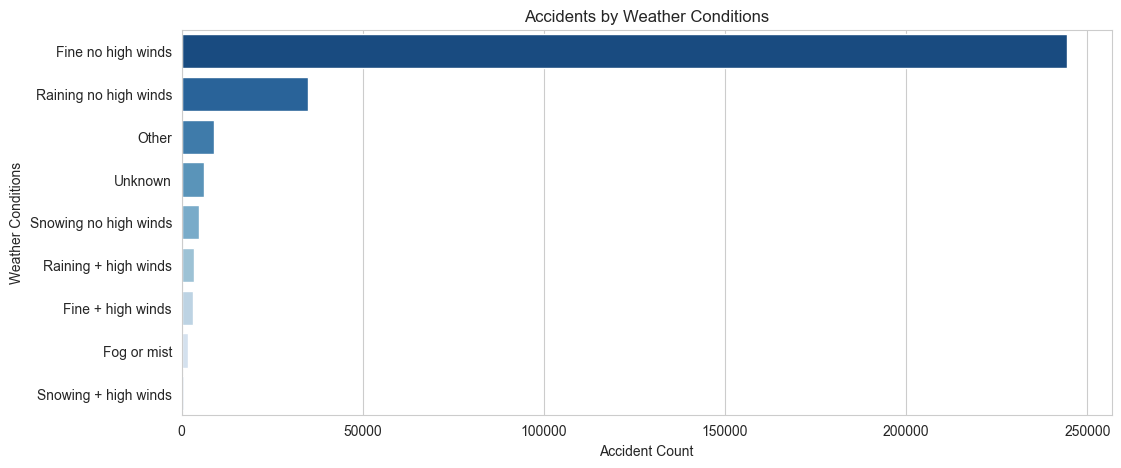

In [15]:

plt.figure(figsize=(12, 5))
sns.countplot(y=df["Weather_Conditions"], order=df["Weather_Conditions"].value_counts().index, palette="Blues_r")
plt.title("Accidents by Weather Conditions")
plt.xlabel("Accident Count")
plt.ylabel("Weather Conditions")
plt.show()

### Road Surface Conditions

/var/folders/x4/2y3znnw91g1b_9wcy2b7t8_c0000gp/T/ipykernel_34720/1830356112.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Road_Surface_Conditions"], order=df["Road_Surface_Conditions"].value_counts().index, palette="Reds_r")


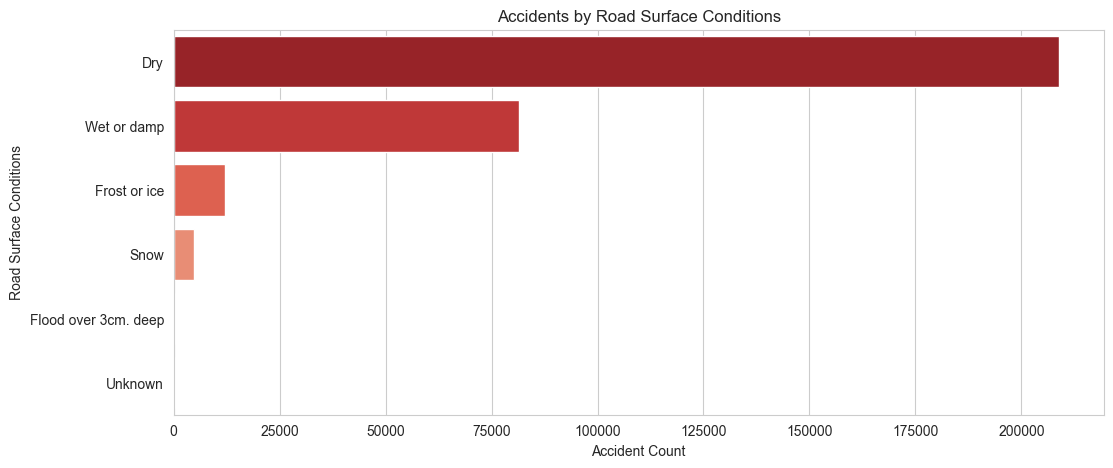

In [16]:
plt.figure(figsize=(12, 5))
sns.countplot(y=df["Road_Surface_Conditions"], order=df["Road_Surface_Conditions"].value_counts().index, palette="Reds_r")
plt.title("Accidents by Road Surface Conditions")
plt.xlabel("Accident Count")
plt.ylabel("Road Surface Conditions")
plt.show()

### Vehicle Type Involvement

/var/folders/x4/2y3znnw91g1b_9wcy2b7t8_c0000gp/T/ipykernel_34720/1565670121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Vehicle_Type"], order=df["Vehicle_Type"].value_counts().index[:10], palette="cividis")


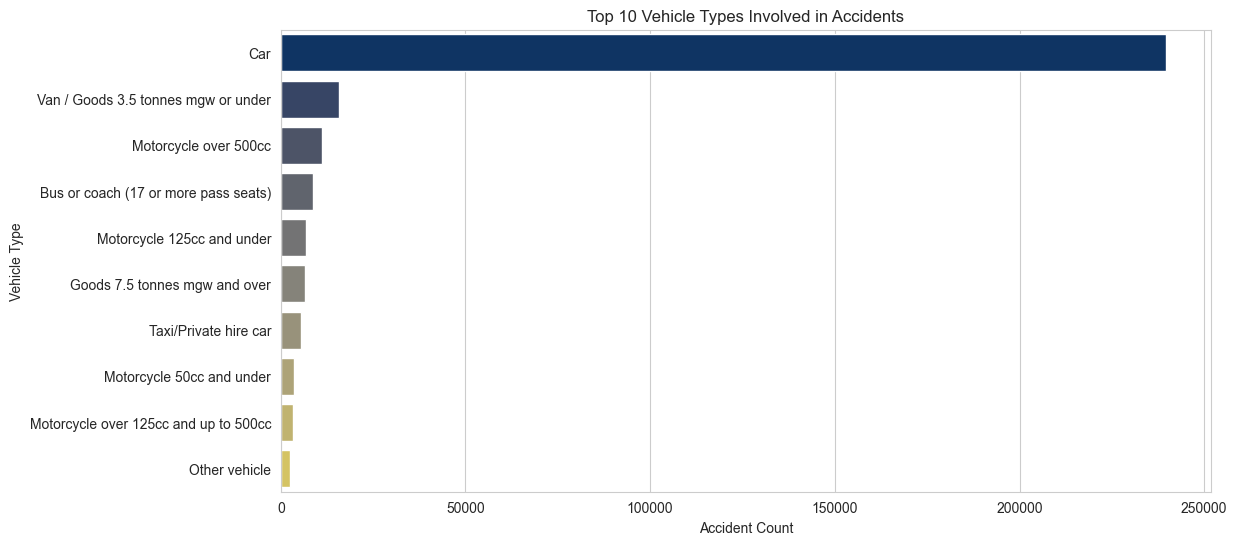

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df["Vehicle_Type"], order=df["Vehicle_Type"].value_counts().index[:10], palette="cividis")
plt.title("Top 10 Vehicle Types Involved in Accidents")
plt.xlabel("Accident Count")
plt.ylabel("Vehicle Type")
plt.show()


### Geospatial Analysis

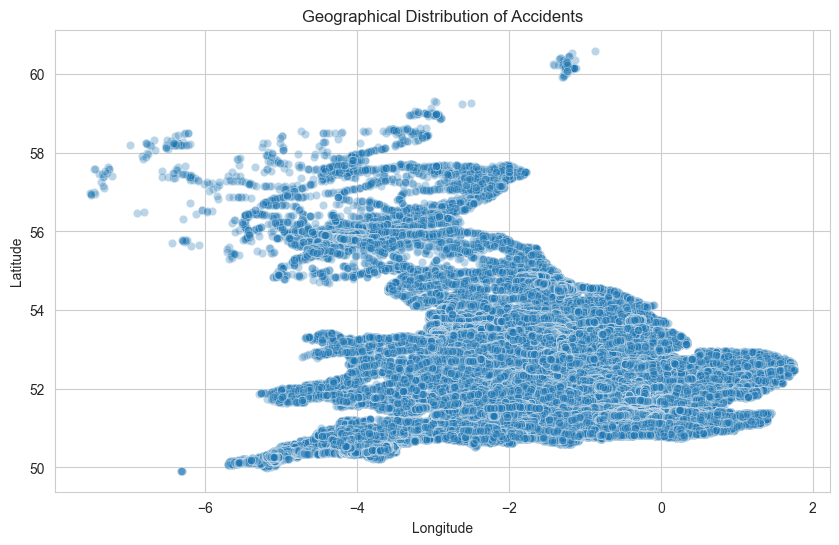

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Longitude"], y=df["Latitude"], alpha=0.3)
plt.title("Geographical Distribution of Accidents")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
